In [128]:
%matplotlib notebook
import numpy as np
from mpl_toolkits import mplot3d
import torch
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

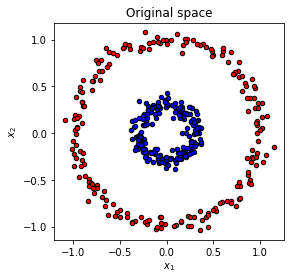

In [12]:
np.random.seed(42)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)


# Plot results

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [13]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = torch.reshape(y_train, [-1, 1])
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_test = torch.reshape(y_test, [-1, 1])

In [14]:
class BinaryClass(torch.nn.Module):
    def __init__(self, n_input):
        super(BinaryClass, self).__init__()
        self.linear1 = torch.nn.Linear(n_input, 3)
        self.linear2 = torch.nn.Linear(3, 1)
        
    def forward(self, X):
        out = self.linear1(X)
        out = torch.sigmoid(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        
        return out

In [15]:
w1 = torch.rand([3, 3], requires_grad=True)
w2 = torch.rand([4, 1], requires_grad=True)

In [70]:
hidden_layer = np.array([[0, 0, 0]])

In [71]:

def BinaryClassManual(X):

    global hidden_layer
    n_samples, _ = X.shape
    ones = torch.ones([n_samples, 1])

    X1 = torch.cat((X, ones), 1)
    out = torch.matmul(X1, w1)
    out = torch.sigmoid(out)
    #print(out)
    hidden_layer = np.append(hidden_layer, out.detach().numpy(), axis=0)
    
    H1 =  torch.cat((out, ones), 1)
    out = torch.matmul(H1, w2)
    out = torch.sigmoid(out)
    return out

In [17]:
n_epoch = 100000
l_rate = 0.01

model = BinaryClass(2)
criterion = torch.nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)
optimizer = torch.optim.SGD([w1, w2], lr=l_rate)

tic = time.perf_counter()

for epoch in range(n_epoch):
    
    #prediction
    #y_pred = model(X_train)
    y_pred = BinaryClassManual(X_train)
    #calculate loss
    loss = criterion(y_pred, y_train)
    #calculate gradients
    loss.backward()
    #update gradients
    optimizer.step()
    #zero grad
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch} loss: {loss.item()}')

toc = time.perf_counter()

print(f"Time elapsed: {toc - tic:0.4f} seconds")

epoch: 99 loss: 0.8937503099441528
epoch: 199 loss: 0.7658254504203796
epoch: 299 loss: 0.7174124717712402
epoch: 399 loss: 0.701019287109375
epoch: 499 loss: 0.6956904530525208
epoch: 599 loss: 0.6939626336097717
epoch: 699 loss: 0.6933817267417908
epoch: 799 loss: 0.6931635141372681
epoch: 899 loss: 0.6930596828460693
epoch: 999 loss: 0.692992091178894
epoch: 1099 loss: 0.6929361820220947
epoch: 1199 loss: 0.6928839087486267
epoch: 1299 loss: 0.6928330659866333
epoch: 1399 loss: 0.6927828192710876
epoch: 1499 loss: 0.6927328705787659
epoch: 1599 loss: 0.692683219909668
epoch: 1699 loss: 0.6926338076591492
epoch: 1799 loss: 0.6925844550132751
epoch: 1899 loss: 0.6925352811813354
epoch: 1999 loss: 0.6924862265586853
epoch: 2099 loss: 0.6924372911453247
epoch: 2199 loss: 0.6923885941505432
epoch: 2299 loss: 0.6923398971557617
epoch: 2399 loss: 0.692291259765625
epoch: 2499 loss: 0.6922427415847778
epoch: 2599 loss: 0.6921942234039307
epoch: 2699 loss: 0.6921457648277283
epoch: 2799 loss

epoch: 22099 loss: 0.6613611578941345
epoch: 22199 loss: 0.660914421081543
epoch: 22299 loss: 0.6604632139205933
epoch: 22399 loss: 0.660007894039154
epoch: 22499 loss: 0.6595485210418701
epoch: 22599 loss: 0.6590849161148071
epoch: 22699 loss: 0.6586172580718994
epoch: 22799 loss: 0.658145546913147
epoch: 22899 loss: 0.6576698422431946
epoch: 22999 loss: 0.6571903824806213
epoch: 23099 loss: 0.6567068099975586
epoch: 23199 loss: 0.6562195420265198
epoch: 23299 loss: 0.6557285785675049
epoch: 23399 loss: 0.6552339196205139
epoch: 23499 loss: 0.6547355651855469
epoch: 23599 loss: 0.6542336940765381
epoch: 23699 loss: 0.6537283062934875
epoch: 23799 loss: 0.6532195210456848
epoch: 23899 loss: 0.6527075171470642
epoch: 23999 loss: 0.6521921157836914
epoch: 24099 loss: 0.6516735553741455
epoch: 24199 loss: 0.6511517763137817
epoch: 24299 loss: 0.6506270170211792
epoch: 24399 loss: 0.6500992774963379
epoch: 24499 loss: 0.6495686769485474
epoch: 24599 loss: 0.6490352153778076
epoch: 24699 lo

epoch: 44299 loss: 0.515357255935669
epoch: 44399 loss: 0.5142629742622375
epoch: 44499 loss: 0.5131617784500122
epoch: 44599 loss: 0.5120539665222168
epoch: 44699 loss: 0.5109400153160095
epoch: 44799 loss: 0.509819507598877
epoch: 44899 loss: 0.5086929202079773
epoch: 44999 loss: 0.5075599551200867
epoch: 45099 loss: 0.5064210891723633
epoch: 45199 loss: 0.5052762627601624
epoch: 45299 loss: 0.5041252970695496
epoch: 45399 loss: 0.5029690265655518
epoch: 45499 loss: 0.5018079280853271
epoch: 45599 loss: 0.5006418228149414
epoch: 45699 loss: 0.49947068095207214
epoch: 45799 loss: 0.4982943832874298
epoch: 45899 loss: 0.4971137046813965
epoch: 45999 loss: 0.4959288537502289
epoch: 46099 loss: 0.4947398602962494
epoch: 46199 loss: 0.4935469627380371
epoch: 46299 loss: 0.4923507273197174
epoch: 46399 loss: 0.49115121364593506
epoch: 46499 loss: 0.4899482727050781
epoch: 46599 loss: 0.48874250054359436
epoch: 46699 loss: 0.4875343441963196
epoch: 46799 loss: 0.48632344603538513
epoch: 468

epoch: 66099 loss: 0.2519042491912842
epoch: 66199 loss: 0.249985933303833
epoch: 66299 loss: 0.24807143211364746
epoch: 66399 loss: 0.24616077542304993
epoch: 66499 loss: 0.2442551702260971
epoch: 66599 loss: 0.24235495924949646
epoch: 66699 loss: 0.24046066403388977
epoch: 66799 loss: 0.2385733723640442
epoch: 66899 loss: 0.23669341206550598
epoch: 66999 loss: 0.2348213791847229
epoch: 67099 loss: 0.23295724391937256
epoch: 67199 loss: 0.231101855635643
epoch: 67299 loss: 0.22925570607185364
epoch: 67399 loss: 0.22741946578025818
epoch: 67499 loss: 0.2255934327840805
epoch: 67599 loss: 0.22377784550189972
epoch: 67699 loss: 0.2219732403755188
epoch: 67799 loss: 0.22018058598041534
epoch: 67899 loss: 0.21839922666549683
epoch: 67999 loss: 0.21662971377372742
epoch: 68099 loss: 0.21487243473529816
epoch: 68199 loss: 0.21312761306762695
epoch: 68299 loss: 0.21139556169509888
epoch: 68399 loss: 0.20967704057693481
epoch: 68499 loss: 0.20797167718410492
epoch: 68599 loss: 0.20627938210964

epoch: 87599 loss: 0.0674949511885643
epoch: 87699 loss: 0.06723974645137787
epoch: 87799 loss: 0.06698642671108246
epoch: 87899 loss: 0.06673488765954971
epoch: 87999 loss: 0.06648541986942291
epoch: 88099 loss: 0.06623774766921997
epoch: 88199 loss: 0.06599199771881104
epoch: 88299 loss: 0.06574781984090805
epoch: 88399 loss: 0.0655054971575737
epoch: 88499 loss: 0.06526505202054977
epoch: 88599 loss: 0.06502640247344971
epoch: 88699 loss: 0.06478936970233917
epoch: 88799 loss: 0.06455401331186295
epoch: 88899 loss: 0.06432026624679565
epoch: 88999 loss: 0.06408840417861938
epoch: 89099 loss: 0.06385830789804459
epoch: 89199 loss: 0.0636296346783638
epoch: 89299 loss: 0.06340253353118896
epoch: 89399 loss: 0.06317716091871262
epoch: 89499 loss: 0.06295330077409744
epoch: 89599 loss: 0.0627310648560524
epoch: 89699 loss: 0.06251036375761032
epoch: 89799 loss: 0.062291212379932404
epoch: 89899 loss: 0.0620734877884388
epoch: 89999 loss: 0.06185729056596756
epoch: 90099 loss: 0.06164274

In [72]:
#X_test2 = torch.tensor([[0.0, 0.9], [-0.88, 0.0], [0.9, 0.9], [0, 0], [0.05, -0.05]])
X_test2 = torch.tensor([[0.05, -0.05]])

with torch.no_grad():
    
    #y_pred = model(X_test)
    y_pred = BinaryClassManual(X_test)
    #y_pred_cls = y_pred.round()

    #accuracy = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])

    #print(f'Accuracy: {accuracy}')
    print(y_pred)

tensor([[0.1049],
        [0.0444],
        [0.9427],
        [0.9529],
        [0.0721],
        [0.0492],
        [0.9501],
        [0.9564],
        [0.0882],
        [0.1231],
        [0.0368],
        [0.9659],
        [0.0339],
        [0.0687],
        [0.9602],
        [0.0472],
        [0.9709],
        [0.0600],
        [0.9666],
        [0.0384],
        [0.0363],
        [0.9668],
        [0.0513],
        [0.8856],
        [0.9494],
        [0.9605],
        [0.0821],
        [0.9575],
        [0.0309],
        [0.9552],
        [0.9674],
        [0.0322],
        [0.0640],
        [0.9749],
        [0.9738],
        [0.9739],
        [0.9662],
        [0.0712],
        [0.9698],
        [0.0518],
        [0.0667],
        [0.9726],
        [0.9542],
        [0.0690],
        [0.9758],
        [0.0737],
        [0.9448],
        [0.9502],
        [0.9448],
        [0.9372],
        [0.9605],
        [0.9032],
        [0.9631],
        [0.9376],
        [0.0300],
        [0

<IPython.core.display.Javascript object>


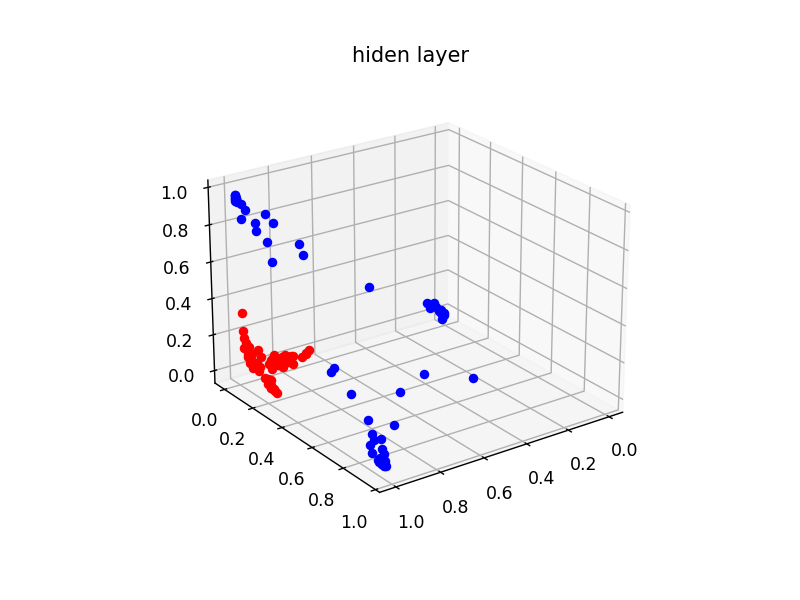

In [129]:
#delete first dummy value
#hidden_layer = np.delete(hidden_layer, 0, axis=0)

hiden_layer_plot = np.append(hidden_layer, y_test.detach().numpy(), axis=1)

fig = plt.figure()
ax = plt.axes(projection ="3d")
plt.title("hiden layer")
 
for element in hiden_layer_plot:
    if (int(element[3]) == 0):
        ax.scatter3D(element[0], element[1], element[2], color = "blue")
    else:
        ax.scatter3D(element[0], element[1], element[2], color = "red")
    
plt.show()

In [24]:
print(w1)
print(w2)

tensor([[ 5.3584,  6.1618, -1.9260],
        [ 6.2583, -1.1644,  6.3669],
        [ 3.6933, -3.1667, -3.3671]], requires_grad=True)
tensor([[ 8.3052],
        [-7.9561],
        [-8.1948],
        [-3.3704]], requires_grad=True)


<IPython.core.display.Javascript object>


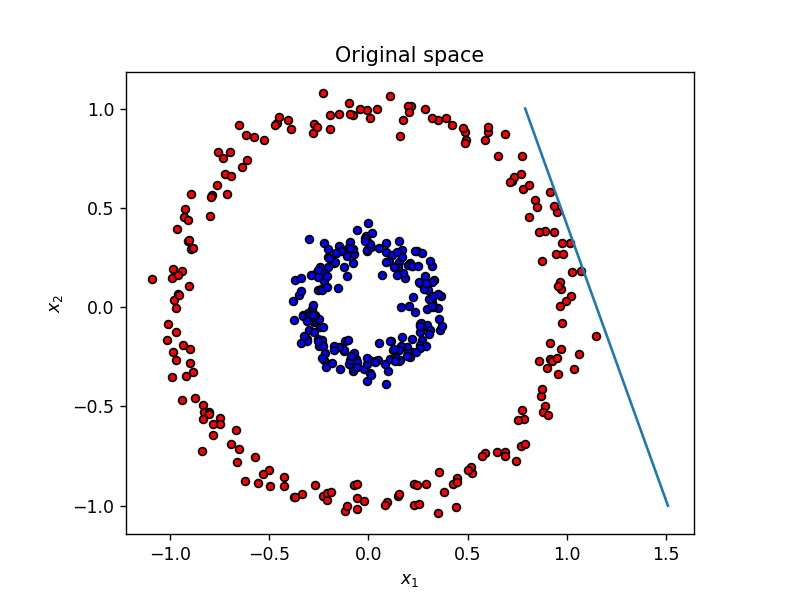

In [130]:
w1np = w1.detach().numpy()
w2np = w2.detach().numpy()
x1_b = np.linspace(-1, 1, 4)
x2_b = (w1np[0][1] + w1np[0][2] * x1_b) / w1np[0][0]

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.plot(x2_b, x1_b, label = "Decision_Boundary")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [86]:
a = np.array([[2,3],[4,3],[5,5]])

np.delete(a, 0, axis=0)

array([[4, 3],
       [5, 5]])